# Bead count

This module will demonstrate how to count the beads in the cluster images:
    
    - Load cluster images.
    - Convert image to binary.
    - Scale image up to increase resolution.
    - Dilate image to reduce the possibility to get close local maximas during watershedding.
    - Convert image to set.
    - Dilate image by factor x.
    - For all foreground pixels find connected pixels as new set with flood fill algorithm.
    - Get boundary boxes.
    - Extract subimages.
    - Write subimages to disk.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
import skimage as ski

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage.morphology import binary_erosion

from skimage import data, color
from skimage.transform import rescale, hough_circle, hough_circle_peaks
from skimage.filters import scharr
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

import modules.oiplib as oiplib

gray2Binary = oiplib.gray2Binary

In [2]:
# Load all clusters.
clusters = oiplib.loadImages("../images/clusters")

In [3]:
# Determine bead count for all clusters.
beadCounts = {}

for cluster in clusters:
    labelImg = oiplib.labelRegionWatershed(cluster)
    labels = np.unique(labelImg)
    
    beadCount = len(labels) - 1
    
    if beadCounts.get(beadCount) is None:
        beadCounts[beadCount] = 1
    else:
        beadCounts[beadCount] += 1

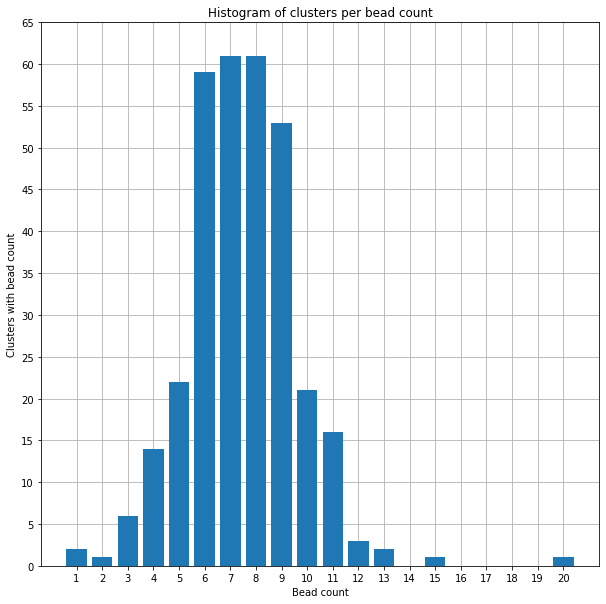

In [4]:
# General histogram variables.
maxBeadCount = max(beadCounts.keys())
maxOccurrenceCount = max(beadCounts.values())
xAxis = np.arange(1, maxBeadCount + 1)
yAxis = np.arange(0, math.ceil(maxOccurrenceCount / 5) + 1) * 5
yHist = np.zeros(maxBeadCount)
yHistCum = np.zeros(maxBeadCount)

# Create histogram.
for key, value in beadCounts.items():
    yHist[key - 1] = value
    
fig, ax = plt.subplots(figsize=(10, 10))
plot = ax.bar(xAxis, yHist)
ax.grid()
ax.set_axisbelow(True)
ax.set_title("Histogram of clusters per bead count")
ax.set_xlabel("Bead count")
ax.set_ylabel("Clusters with bead count")
ax.set_xticks(xAxis);
ax.set_yticks(yAxis);